In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
#data_path="C://Users//surdu/Desktop/roraima/RR/Dados/Pessoas/Amostra_Pessoas_14.txt"
data_path="Amostra_Pessoas_14.txt"

col_specs=[(2,7),(7,20),(52,53),(73,74),(193,194),(194,195),\
          (349,350),(145,146),(153,155),\
          (262,269)]
col_names=["municipio","area_p","urbano","nasc_aqui","estado_civil","trabalhou",\
          "retorna_diariamente","sabe_ler","curso_mais_elevado",\
          "renda_total_julho"]

roraima=pd.read_fwf(data_path,colspecs=col_specs, names=col_names)

print(roraima)

       municipio         area_p  urbano  nasc_aqui  estado_civil  trabalhou  \
0             27  1400027001001       2          3           5.0        1.0   
1             27  1400027001001       2          1           5.0        2.0   
2             27  1400027001001       2          1           5.0        2.0   
3             27  1400027001001       2          1           NaN        NaN   
4             27  1400027001001       2          1           NaN        NaN   
...          ...            ...     ...        ...           ...        ...   
63760        704  1400704001001       2          1           NaN        NaN   
63761        704  1400704001001       2          1           NaN        NaN   
63762        704  1400704001001       2          1           5.0        2.0   
63763        704  1400704001001       2          1           5.0        2.0   
63764        704  1400704001001       2          1           NaN        NaN   

       retorna_diariamente  sabe_ler  curso_mais_el

In [6]:
roraima=roraima.fillna(-1)

roraima=roraima[roraima["renda_total_julho"]>-0.5]

print(roraima)

       municipio         area_p  urbano  nasc_aqui  estado_civil  trabalhou  \
0             27  1400027001001       2          3           5.0        1.0   
1             27  1400027001001       2          1           5.0        2.0   
2             27  1400027001001       2          1           5.0        2.0   
6             27  1400027001001       2          1           1.0        2.0   
7             27  1400027001001       2          1           1.0        2.0   
...          ...            ...     ...        ...           ...        ...   
63755        704  1400704001001       2          1           3.0        2.0   
63757        704  1400704001001       2          1           3.0        2.0   
63758        704  1400704001001       2          1           3.0        2.0   
63762        704  1400704001001       2          1           5.0        2.0   
63763        704  1400704001001       2          1           5.0        2.0   

       retorna_diariamente  sabe_ler  curso_mais_el

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002324D6038C8>,
      dtype=object)

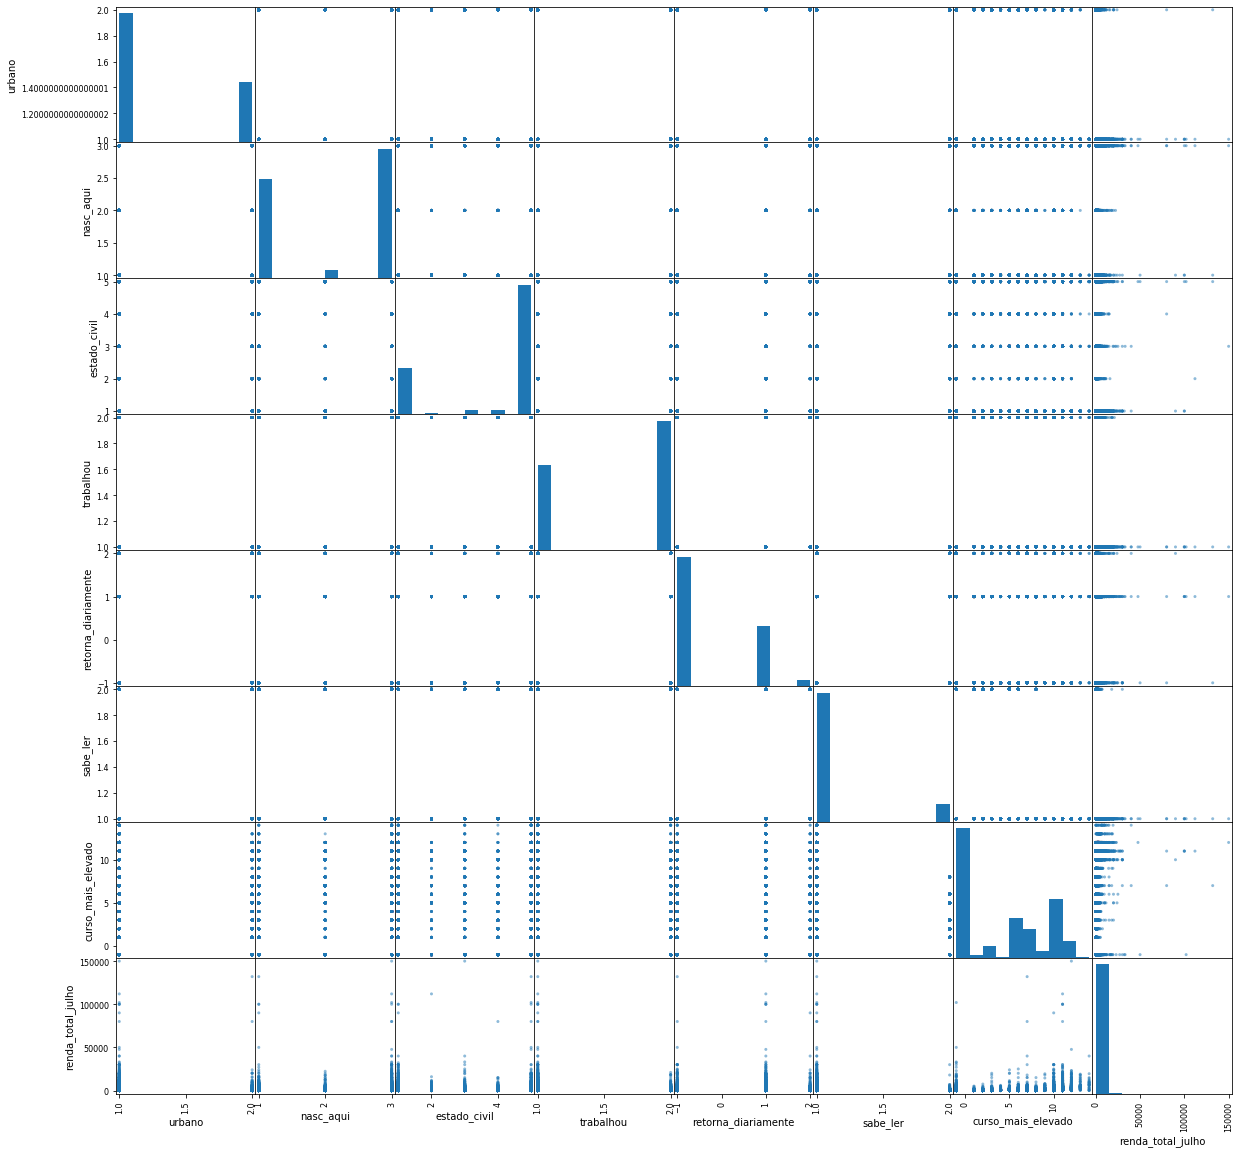

In [8]:
from pandas.plotting import scatter_matrix

scatter_matrix(roraima[col_names[2:None]], figsize=(20,20))

In [10]:
roraima=roraima[roraima["renda_total_julho"]>0]

In [11]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(roraima[col_names[2:-1]], roraima["renda_total_julho"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
from sklearn.metrics import mean_squared_error

lin_mse=mean_squared_error(roraima["renda_total_julho"], lin_reg.predict(roraima[col_names[2:-1]]))

sd_1 = np.sqrt(lin_mse)
sd_1

2711.464329580894

In [18]:
from sklearn.metrics import explained_variance_score

explained_variance_score(roraima["renda_total_julho"],lin_reg.predict(roraima[col_names[2:-1]]) )

0.045784162702885545

In [19]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(roraima[col_names[2:-1]], roraima["renda_total_julho"])

explained_variance_score(roraima["renda_total_julho"],forest_reg.predict(roraima[col_names[2:-1]]) )

0.157870523805565

In [20]:
roraima["renda_mil"] = roraima["renda_total_julho"] > 1000

from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(roraima[col_names[2:-1]], roraima["renda_mil"])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(roraima["renda_mil"],log_clf.predict(roraima[col_names[2:-1]])))

[[19604  1035]
 [ 5553  1458]]


In [22]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(roraima[col_names[2:-1]], roraima["renda_mil"])
print(confusion_matrix(roraima["renda_mil"],forest_clf.predict(roraima[col_names[2:-1]])))

[[19574  1065]
 [ 4171  2840]]
